In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
import pandas as pd

data = pd.DataFrame(X)
data.insert(784, "label", y)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
X_train[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

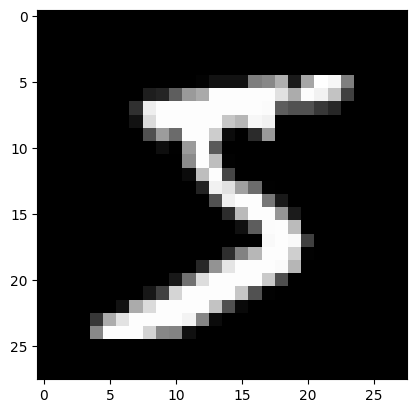

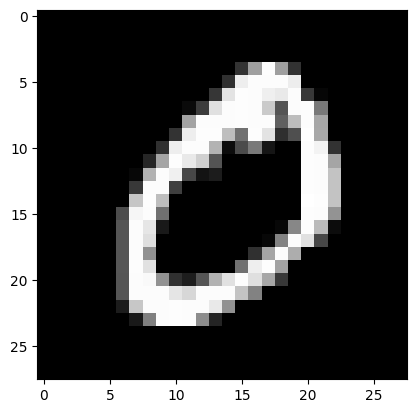

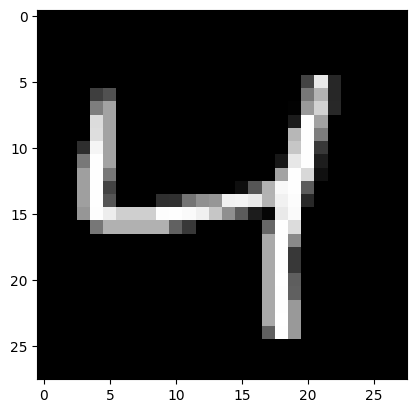

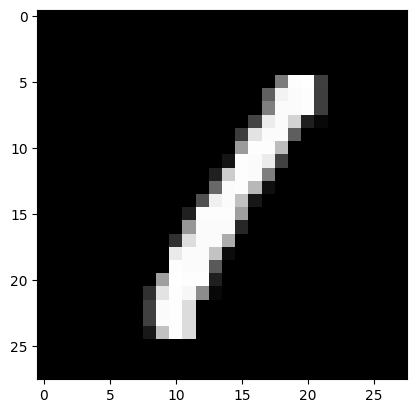

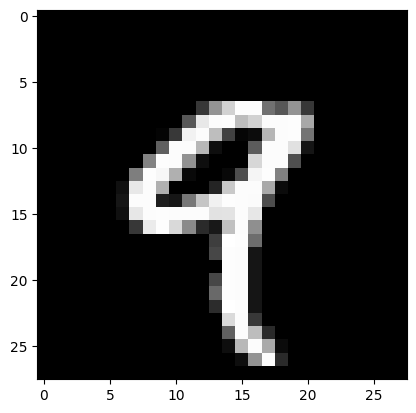

In [4]:
import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [6]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [7]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['0', '1', '1', ..., '7', '6', '1'], dtype='<U1')

In [8]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

In [9]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['0', '4', '1', ..., '9', '0', '1'], dtype='<U1')

Actual Value: 0
Predicted Value: 0


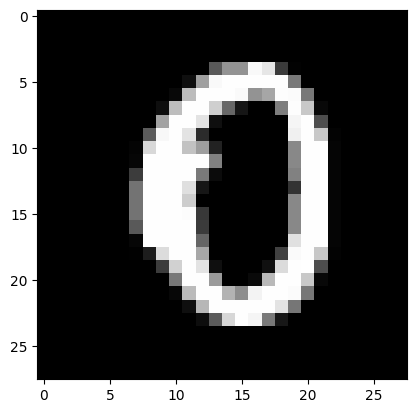

In [10]:
print(f"Actual Value: {y_test[0]}")
print(f"Predicted Value: {predictions_NN2[0]}")


plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.show()

Actual Value: 4
Predicted Value For 1 Hidden Layer: 1
Predicted Value For 100 Hidden Layer: 4
Predicted Value For 1000 Hidden Layer: 4


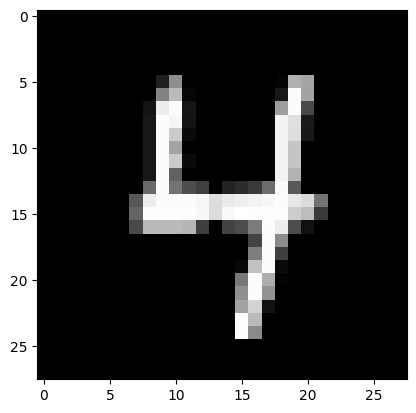

In [11]:
print(f"Actual Value: {y_test[1]}")
print(f"Predicted Value For 1 Hidden Layer: {predictions_NN[1]}")
print(f"Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}")
print(f"Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}")


plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_NN)

array([[ 601,    9,  413,   78,    0,    0,  965,    0,   11,    0],
       [   8, 2078,   16,   77,   35,    0,   32,    1,  136,    2],
       [ 309,   62,  406,  277,   13,    0,  992,    3,   43,   10],
       [ 101,  243,  479,  909,   40,    0,  134,   15,  184,   12],
       [  12,  389,   26,   55,  789,    0,    9,  165,   34,  525],
       [ 100,  161,  512,  864,   10,    0,   91,   24,  137,    1],
       [  89,    7,   70,   32,    1,    0, 1844,    0,    1,    1],
       [   2,  141,    4,   18,  298,    0,    0, 1497,   11,  218],
       [  30,  379,  264, 1026,   27,    0,   26,    8,  281,    1],
       [   2,  169,   11,   29,  428,    0,    1,  931,   12,  543]])

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_NN))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.48      0.29      0.36      2077
           1       0.57      0.87      0.69      2385
           2       0.18      0.19      0.19      2115
           3       0.27      0.43      0.33      2117
           4       0.48      0.39      0.43      2004
           5       0.00      0.00      0.00      1900
           6       0.45      0.90      0.60      2045
           7       0.57      0.68      0.62      2189
           8       0.33      0.14      0.19      2042
           9       0.41      0.26      0.32      2126

    accuracy                           0.43     21000
   macro avg       0.37      0.42      0.37     21000
weighted avg       0.38      0.43      0.38     21000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
confusion_matrix(y_test, predictions_NN1)

array([[2048,    0,    3,    4,    1,    6,   10,    1,    2,    2],
       [   0, 2355,   11,    6,    3,    0,    2,    3,    4,    1],
       [   4,    2, 2066,    8,    8,    1,    3,    8,   12,    3],
       [   1,    3,   23, 2041,    1,   18,    0,    9,   11,   10],
       [   2,    2,    5,    1, 1955,    0,    8,    6,    4,   21],
       [   4,    0,    1,   17,    7, 1836,   19,    2,    7,    7],
       [   5,    3,    4,    1,   10,   11, 2003,    3,    5,    0],
       [   0,    7,   11,    5,    6,    4,    1, 2132,    4,   19],
       [   5,   14,    9,   13,    4,    6,    6,    4, 1966,   15],
       [   4,    1,    1,    9,   26,    7,    0,   15,    6, 2057]])

In [16]:
print(classification_report(y_test,predictions_NN1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2385
           2       0.97      0.98      0.97      2115
           3       0.97      0.96      0.97      2117
           4       0.97      0.98      0.97      2004
           5       0.97      0.97      0.97      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.97      0.98      2189
           8       0.97      0.96      0.97      2042
           9       0.96      0.97      0.97      2126

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [17]:
confusion_matrix(y_test, predictions_NN2)

array([[2055,    0,    1,    0,    1,    4,   11,    1,    4,    0],
       [   1, 2349,   10,    6,    2,    1,    2,    5,    5,    4],
       [   4,    3, 2073,    7,    2,    1,    2,   11,   11,    1],
       [   0,    1,   11, 2069,    0,    9,    0,    7,   17,    3],
       [   1,    0,    4,    1, 1963,    0,    8,    5,    5,   17],
       [   2,    0,    3,    9,    5, 1853,   11,    1,   11,    5],
       [   5,    2,    3,    1,   11,   10, 2006,    1,    6,    0],
       [   1,    3,   12,    2,    9,    3,    0, 2146,    4,    9],
       [   4,    4,    4,   13,    3,    4,    5,    1, 1995,    9],
       [   5,    0,    0,   10,   20,    5,    2,    9,    6, 2069]])

In [18]:
print(classification_report(y_test,predictions_NN2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.98      0.99      2385
           2       0.98      0.98      0.98      2115
           3       0.98      0.98      0.98      2117
           4       0.97      0.98      0.98      2004
           5       0.98      0.98      0.98      1900
           6       0.98      0.98      0.98      2045
           7       0.98      0.98      0.98      2189
           8       0.97      0.98      0.97      2042
           9       0.98      0.97      0.98      2126

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

